# Лабораторная работа №5


###1.   Реализовать 3 генератора данных на плоскости или в пространстве
###2.   Написать реализацию метода Парзена-Розенблатта
###3.   Восстановить плотность в виде картинки
###4.   Для одного набора данных  применить оптимизацию ширины окна методом Leave One Out.
###5.   Для сгенерированных данных с 2-мя и более горбами применить EM-алгоритм из sckit-learn






In [ ]:
import math
import copy
import numpy as np
import random
import matplotlib
from typing import Mapping
from matplotlib import pyplot as plt
from matplotlib import ticker as mtick

#Равномерное распределение

In [ ]:
def uniform_dist(a=0, b=1):
    return random.random() * (b-a)+a

def uniform_data(n,a=0,b=1):
    res = []
    for i in range (n):
        res.append(uniform_dist(a,b))
    return res

#Экспоненциальное распределение

In [ ]:
def exponential_dist(a=2.0):
    return math.log(1 / (1 - random.random())) / a

def exponential_data(n,a=2.0):
    res = []
    for i in range (n):
        res.append(exponential_dist(a))
    return res

#Распределение Рэлея

In [ ]:
def rayleigh_dist(k=4.0):
    return math.sqrt(-2*k*k*math.log(1 - random.random()))

def rayleigh_data(n,k=1.0):
    res = []
    for i in range (n):
        res.append(rayleigh_dist(k))
    return res

#Парзен-Розенблатт

In [ ]:
def gauss_kernel(x):
    return ((2 * math.pi) ** (-1/2)) * np.exp(-1/2 * (x ** 2))

In [ ]:
def parzen_rozen(x, data, h):
    res = 0
    for i in data:
        res = res + gauss_kernel((x - i)/h)
    return res / (len(data)*h)

#Восстановление плотности

In [ ]:
def draw_result(data_generator: Mapping, title: str, width: float = 0.3, count: int = 10000):
  data = data_generator(count)
  x = np.linspace(min(data), max(data), count)
  fig, ax = plt.subplots(figsize=(10, 10))
  ax.plot(x, parzen_rozen(x, data, width))
  
  ax.set_xlim((min(data), max(data)))
  ax.set_title( title)
  ax.set_xlabel('x')
  ax.set_ylabel('p`(x)')
  plt.show()

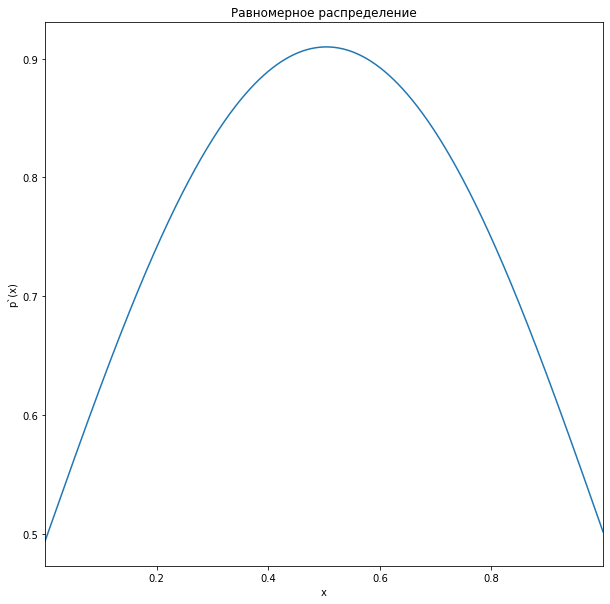

In [ ]:
draw_result(uniform_data, "Равномерное распределение")

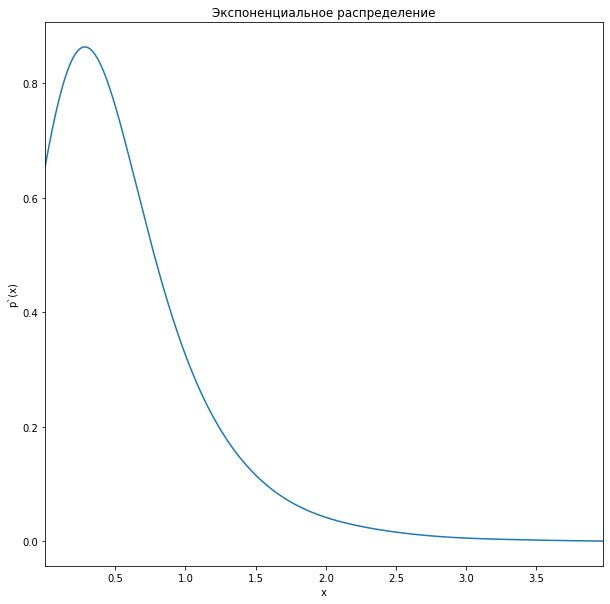

In [ ]:
draw_result(exponential_data, "Экспоненциальное распределение")

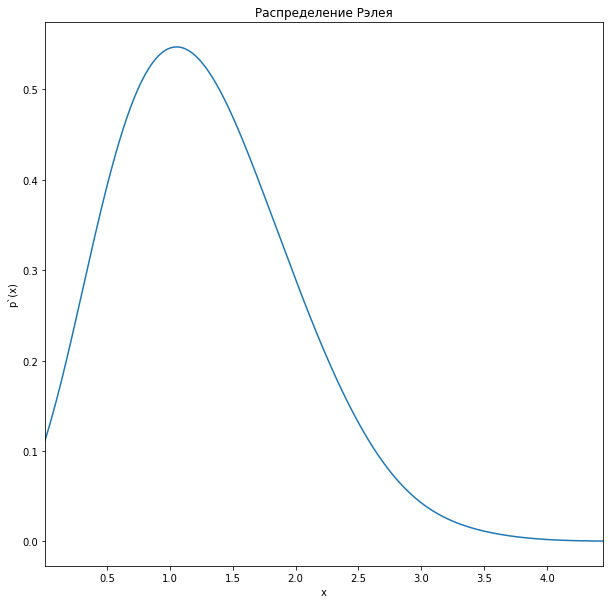

In [ ]:
draw_result(rayleigh_data, "Распределение Рэлея")

#Leave One Out

In [ ]:
def LeaveOneOut(data,h):
    loo = 0
    for i in range(len(data)):
        loo = loo - math.log(parzen_rozen(data[i],data[:i] + data[i+1:],h=h))
    return loo


print(f"LOO при стартовом значении h=0.1: {LeaveOneOut(rayleigh_data(1000),0.1)}")

LOO при стартовом значении h=0.1: 993.1279339984751


#EM-алгоритм

In [ ]:
def two_rayleigh(n) -> np.ndarray:
    res = []
    for i in range(10000):
      r = uniform_dist()
      if r > 0.5:
          res.append(rayleigh_dist(0.1))
      else:
          res.append(rayleigh_dist(0.5))
    return np.array(res) 

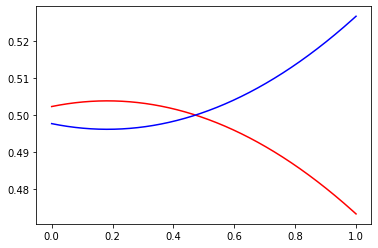

In [ ]:
from sklearn.mixture import GaussianMixture

two_functions = two_rayleigh(1).reshape(-1, 1)
gm = GaussianMixture(n_components=2, init_params='random', random_state=0).fit(two_functions)

x = np.linspace(0, 1, 20000)

y_first = gm.predict_proba(np.array(x).reshape(-1, 1))[:,0]
y_second = gm.predict_proba(np.array(x).reshape(-1, 1))[:,1]

plt.plot(x, y_first, color = 'red')
plt.plot(x, y_second, color = 'blue') 

plt.show()